In [458]:
#Import
import pandas as pd
import seaborn as sns

In [459]:
#Read CSV FILE
df = pd.read_csv('https://raw.githubusercontent.com/HaoyuHunterFang/schulich_data_science/main/sales_data.csv?token=GHSAT0AAAAAACCZGR43RWCSJKXUEDSCCMS6ZDK4CFA')

In [460]:
#Check the information of the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [461]:
#Data cleaning: Replace the null value to 'Other ' in the column of 'Product'
df['Product'] = df['Product'].fillna('Other')

In [462]:
#Data cleaning: Replace the null value to 'Other ' in the column of 'Region'
df['Region'] = df['Region'].fillna('Other')

In [463]:
#Data cleaning: Replace the null value to the mean of price in the column of 'Price'
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [464]:
#Data cleaning: Replace the null value to the mean of units sold in the column of 'Units Sold'
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())

In [465]:
#Checking the updated info & confirm all null are filled.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


<Axes: >

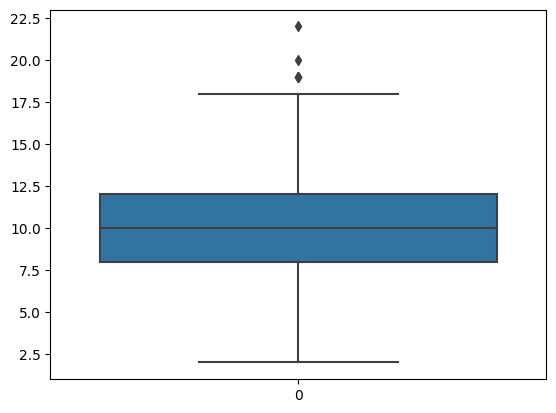

In [466]:
#Check the info that I need to use if it has outliers
sns.boxplot(df['Units Sold'])

<Axes: >

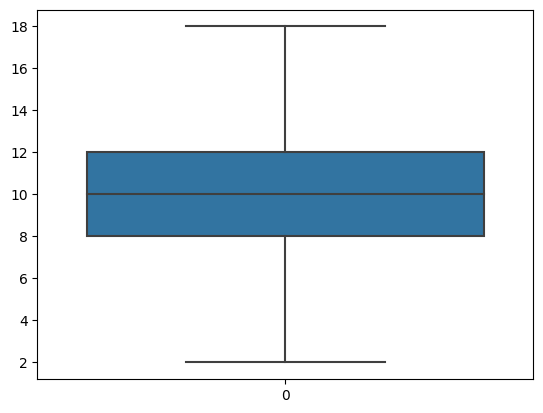

In [467]:
#Drop the outlier
df.drop(df[df['Units Sold'] > 18].index,inplace = True)
sns.boxplot(df['Units Sold'])

In [468]:
#Calculating the revenue
Revenue = df['Units Sold'] * df['Price']

In [469]:
#Add the column named 'Revenue'
df['Revenue'] = Revenue

In [470]:
#To measure the products sold from highest to lowest.
df_product = df.groupby('Product')['Revenue'].aggregate(['mean'])
df_product.sort_values('mean',ascending=False)

,mean
Product,
Product_26,2419.504779
Product_7,1544.448575
Product_49,1477.942308
Product_15,1461.380081
Product_20,1438.983840
Product_41,1438.620119
Product_31,1437.105909
Product_14,1407.813996
Product_35,1362.290380


<Axes: >

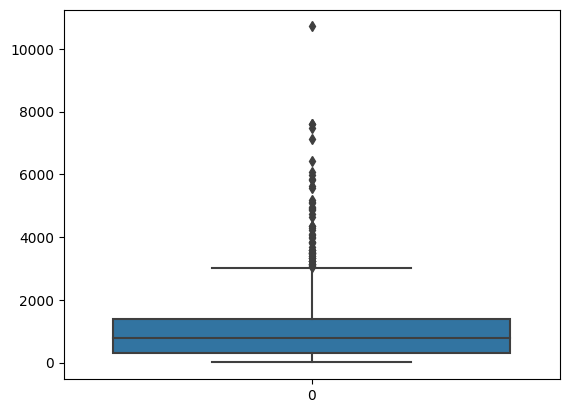

In [471]:
#Check the revenue
sns.boxplot(df['Revenue'])

In [472]:
#Find the Maximum Revenue within the specific product & region
df[df['Revenue']>9000]

,Product,Region,Price,Units Sold,Sale Date,Revenue
969,Product_15,Region_8,2143.3,5.0,2024-08-27,10716.5


In [473]:
df.sort_values('Sale Date',ascending=True)

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Other,Region_6,75.96,10.0,2022-01-01,759.60
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
995,Other,Region_7,31.83,13.0,2024-09-22,413.79
996,Product_36,Other,46.19,9.0,2024-09-23,415.71
997,Other,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


In [474]:
#Convert "Sale Date" column to datetime
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [475]:
#Separate Time from 2022-01-01 to 2022-12-31
start_date_2022 = pd.to_datetime('2022-01-01')
end_date_2022 = pd.to_datetime('2022-12-31')
date_2022 = df[(df['Sale Date']>= start_date_2022) & (df['Sale Date'] <= end_date_2022)]
year_2022 = date_2022.groupby('Sale Date').agg({'Product':'sum','Region':'sum', 'Revenue': 'mean', "Units Sold":'sum','Price':'sum'})
year_2022

,Product,Region,Revenue,Units Sold,Price
Sale Date,,,,,
2022-01-01,Other,Region_6,759.600000,10.000000,75.960000
2022-01-02,Other,Region_1,1406.240000,8.000000,175.780000
2022-01-03,Product_46,Region_3,245.160000,12.000000,20.430000
2022-01-04,Product_36,Region_1,127.700000,10.000000,12.770000
2022-01-05,Product_17,Region_6,754.140000,6.000000,125.690000
...,...,...,...,...,...
2022-12-27,Product_7,Region_4,1075.986878,10.000000,107.598688
2022-12-28,Product_11,Region_5,1439.190000,9.000000,159.910000
2022-12-29,Product_35,Region_1,1559.144778,10.048626,155.160000


<Axes: xlabel='Region', ylabel='Revenue'>

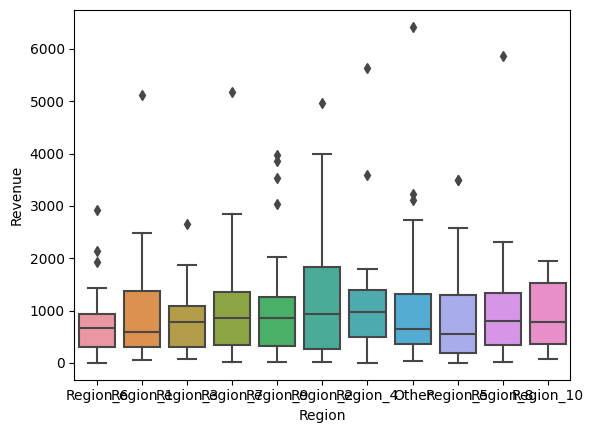

In [476]:
#Check the relationship between region and revenue in 2022
sns.boxplot(data = date_2022, x = 'Region' , y = 'Revenue')

<Axes: xlabel='Product', ylabel='Revenue'>

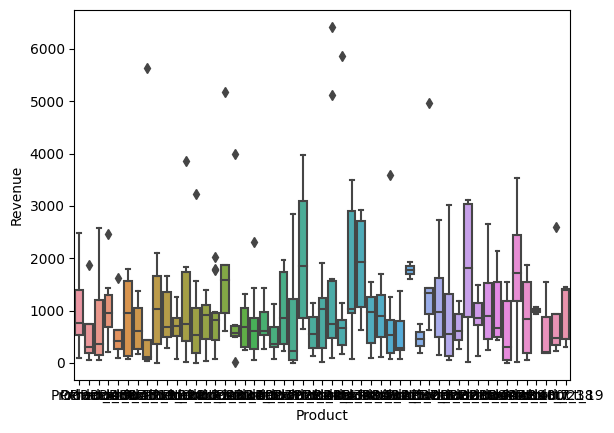

In [477]:
#Check the relationship between Product and Revenue in 2022
sns.boxplot(data = date_2022, x = 'Product', y = 'Revenue')

<Axes: xlabel='Price', ylabel='Units Sold'>

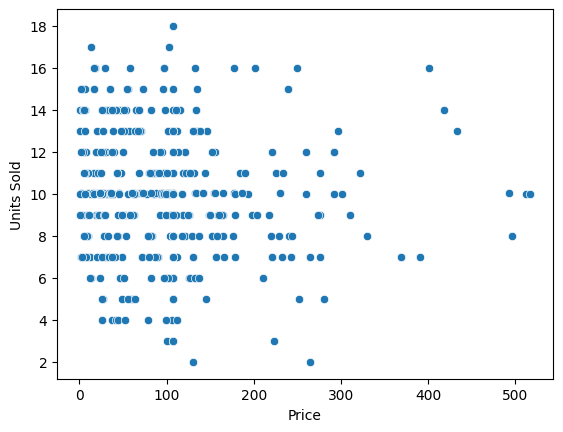

In [478]:
#Check the scatter plot with Price/Units Sold in 2022
sns.scatterplot(data = date_2022, x = 'Price', y = 'Units Sold')

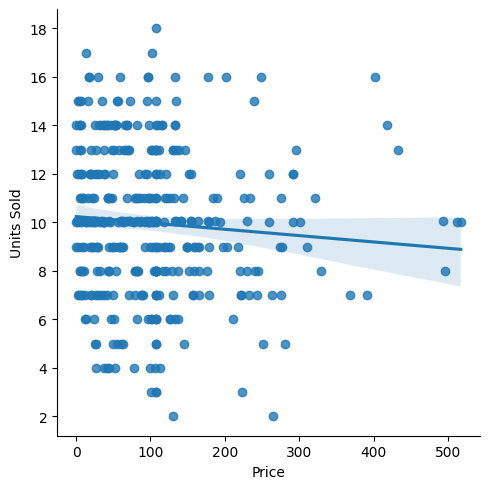

In [479]:
#Shows the trend of units sold/price
sns.lmplot(data = date_2022, x = 'Price', y = 'Units Sold', fit_reg=True)

In [480]:
#Time from 2023-01-01 to 2023-12-31
start_date_2023 = pd.to_datetime('2023-01-01')
end_date_2023 = pd.to_datetime('2023-12-31')
date_2023 = df[(df['Sale Date']>= start_date_2023) & (df['Sale Date'] <= end_date_2023)]
year_2023 = date_2023.groupby('Sale Date').agg({'Product':'sum','Region':'sum', 'Revenue': 'mean', "Units Sold":'sum','Price':'sum'})
year_2023

,Product,Region,Revenue,Units Sold,Price
Sale Date,,,,,
2023-01-01,Product_41,Region_3,1614.960000,12.000000,134.580000
2023-01-02,Other,Region_10,1123.100000,10.000000,112.310000
2023-01-03,Product_36,Region_5,968.388190,9.000000,107.598688
2023-01-04,Product_5,Region_8,868.904672,10.048626,86.470000
2023-01-05,Product_14,Other,920.480000,11.000000,83.680000
...,...,...,...,...,...
2023-12-27,OtherOther,Region_8Region_8,537.993439,10.000000,215.197376
2023-12-28,Product_30,Other,31.070000,13.000000,2.390000
2023-12-29,Product_5,Region_9,1684.350655,10.048626,167.620000


<Axes: xlabel='Region', ylabel='Revenue'>

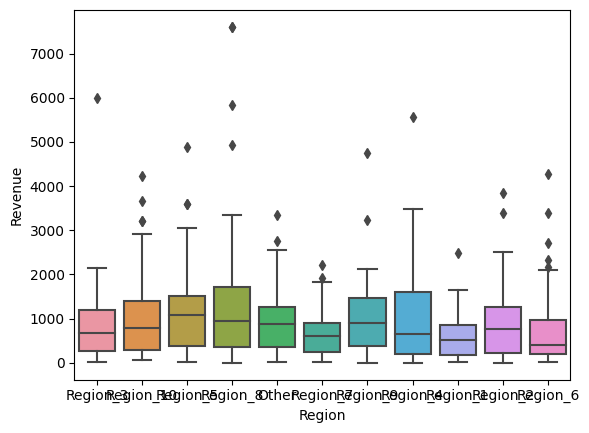

In [481]:
#Check the relationship between region and revenue in 2023
sns.boxplot(data = date_2023, x = 'Region' , y = 'Revenue')

<Axes: xlabel='Product', ylabel='Revenue'>

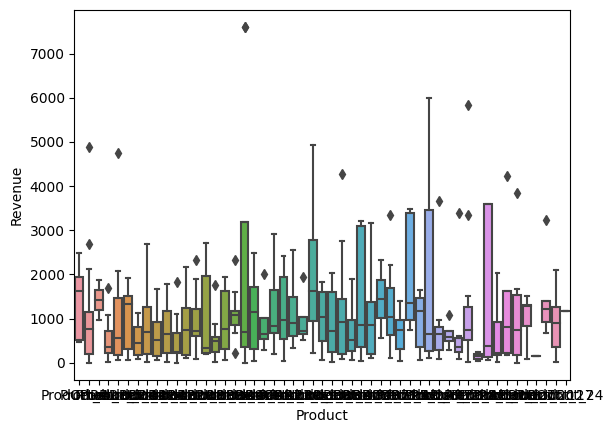

In [482]:
#Check the relationship between Product and Revenue in 2023
sns.boxplot(data = date_2023, x = 'Product' , y = 'Revenue')

<Axes: xlabel='Price', ylabel='Units Sold'>

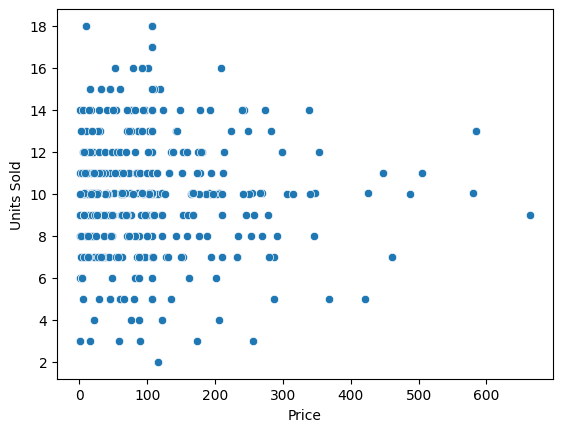

In [483]:
#Check the scatter plot with Price/Units Sold in 2023
sns.scatterplot(data = date_2023, x = 'Price', y = 'Units Sold')

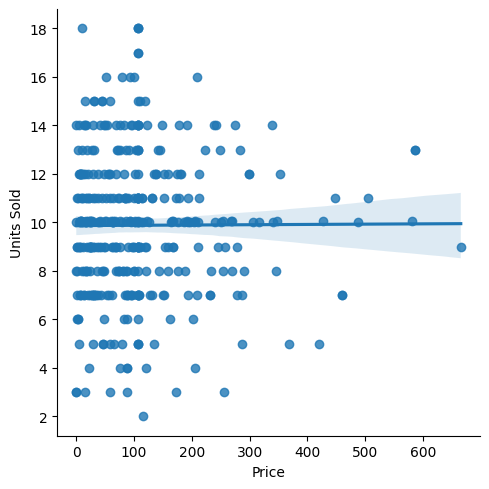

In [484]:
#Shows the trend of units sold/price
sns.lmplot(data = date_2023, x = 'Price', y = 'Units Sold', fit_reg=True)

In [485]:
start_date_2024 = pd.to_datetime('2024-01-01')
end_date_2024 = pd.to_datetime('2024-12-31')
date_2024 = df[(df['Sale Date']>= start_date_2024) & (df['Sale Date'] <= end_date_2024)]
year_2024 = date_2024.groupby('Sale Date').agg({'Product':'sum','Region':'sum', 'Revenue': 'mean',"Units Sold":'sum','Price':'sum'})
year_2024

,Product,Region,Revenue,Units Sold,Price
Sale Date,,,,,
2024-01-01,Product_2,Region_1,180.000000,10.000000,18.00
2024-01-02,Product_36,Region_3,1123.134905,10.048626,111.77
2024-01-03,Product_45,Other,628.800000,8.000000,78.60
2024-01-04,Product_40,Region_10,887.370000,11.000000,80.67
2024-01-05,Product_39,Other,712.170000,9.000000,79.13
...,...,...,...,...,...
2024-09-22,Other,Region_7,413.790000,13.000000,31.83
2024-09-23,Product_36,Other,415.710000,9.000000,46.19
2024-09-24,Other,Region_7,4053.400000,13.000000,311.80


<Axes: xlabel='Region', ylabel='Revenue'>

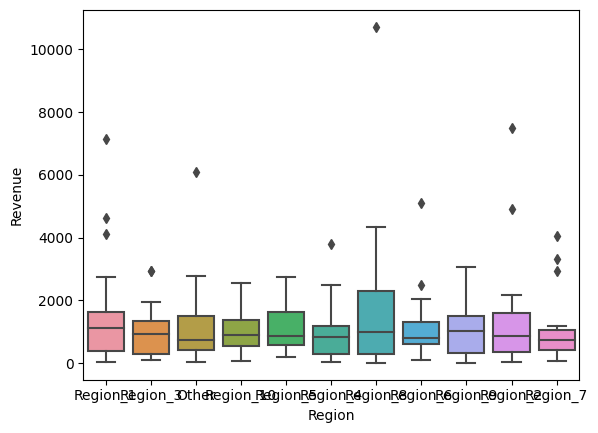

In [486]:
#Check the relationship between region and revenue in 2024
sns.boxplot(data = date_2024, x = 'Region' , y = 'Revenue')

<Axes: xlabel='Product', ylabel='Revenue'>

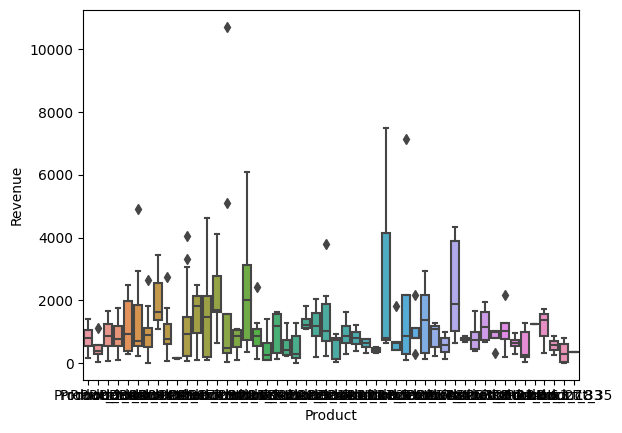

In [487]:
#Check the relationship between Product and Revenue in 2024
sns.boxplot(data = date_2024, x = 'Product' , y = 'Revenue')

<Axes: xlabel='Price', ylabel='Units Sold'>

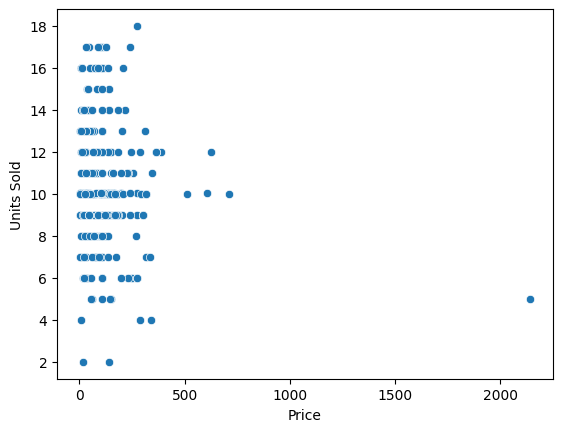

In [488]:
#Check the scatter plot with Price/Units Sold in 2024
sns.scatterplot(data = date_2024, x = 'Price', y = 'Units Sold')

In [489]:
#Find the outlier
date_2024[date_2024['Price']>2000]

,Product,Region,Price,Units Sold,Sale Date,Revenue
969,Product_15,Region_8,2143.3,5.0,2024-08-27,10716.5


In [491]:
#Clear the outlier
date_2024.drop(date_2024[date_2024['Price']>2000].index,inplace=True)

/var/folders/n0/ybgqz5zd2cx4wbm8cv8vr3gr0000gn/T/ipykernel_25527/3319782328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_2024.drop(date_2024[date_2024['Price']>2000].index,inplace=True)


<Axes: xlabel='Price', ylabel='Units Sold'>

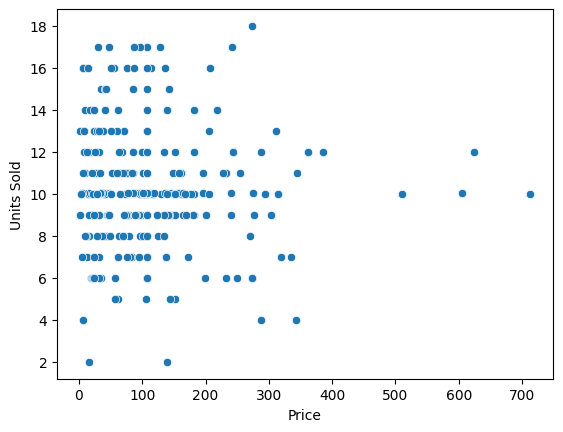

In [492]:
#Check the scatter plot with Price/Units Sold in 2024
sns.scatterplot(data = date_2024, x = 'Price', y = 'Units Sold')

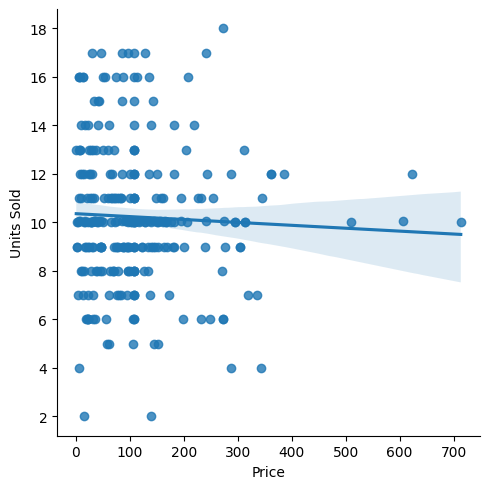

In [493]:
#Shows the trend of units sold/price
sns.lmplot(data = date_2024, x = 'Price', y = 'Units Sold', fit_reg=True)

Question 1:

Compared with the other products, Product_26 are the most product sold since it got the highest revenue's mean (Product_26, mean = 2419.50); on the other hand, Product_5 has only 625.80 revenue's mean which is in the last position. According to the box plot of revenue, it can be seen that the highest revenue belongs to product_15, which reached $10,716.5 on August 27, 2024.

The analysis was made for region, product, and revenue after dividing the time into three intervals. In 2022, Region_6 sold most product to get the most considerable revenue, and product_24 and 41 had a large revenue compared with others through the boxplot reflecting the relationship between Product and Revenue. Product_30 is in the fron of line, so it indicates that their income is also significant.

In 2023, there are not much significantly difference between sales performance in all regions, but it is worth to mention that Region_3 is slightly higher than other region to get enough revenue. Product_25 got the most revenue in 2023 because its mean value is higher than other products. Also, product_3 has the high revenue annually even if the range of product_3 are not bigger than product_25.

A similar result as in 2023 occurs for comparisons among regions in 2024, so all regions got the close result. Although it is hard to describe the strongest competitors, Region_1 was supposed to get the good revenue. In 2024, Product_17 has approximate $2,000 annual revenue.

Question 2:

The scatter plots and regression lines with three different periods show that units sold slowly decreased when the price when up, so the price is the most important point for customer to think if they may purchase on them. The company should consider how to keep the price within the reasonable range because three scatter plots reveal most points are concentrated between 0 to 200.

The business can keep investing the best products to sell; in this way, they can maximize the revenue in the future. If some products didn't provide much revenue, the business can consider to improve them; at the same time, some of them can remove from the product list to avoid losing in the next year. 

Question 3:

First of all, we need to check if the data has null value, if there is null value, we need to clear the missing data. What I did is to assign value to replace null value. In this dataframe, "Project", "Region", "Price", and "Units Sold" have null values, so I used "Other" and "price/units sold.mean()" to replace them.

Once I confirmed that all data are valuable, I checked the "Units Sold" if it has outliers I need to remove. I found that there are three outliers need to be cleared; therefore, I dropped them and double checked if the boxplot of units sold still existed outliers.

In order to find out the sales performance of regions and products, I decided to calculate the revenue, and the next step is to sort the list of revenue's mean from the highest value to the lowest value. In this way, it can easily understand the sales performance of all products.

After drawing the boxplot of revenue, I didn't choose to clear the data because there are so many outliers, and it is unnecessary to clear at this moment. I found that which product is the best sold in the specific region (Product_15, Region_8).

The reason why I separated time to three periods is to perfectly understand the relationship between price and the amount of products sold; meanwhile, it can be better to show me the detailed when the revenue comparing with regions and products.